In [57]:
import pandas as pd
from matplotlib import pyplot as plt

In [58]:
markov_df = pd.read_csv('markov.csv')
logit_df = pd.read_csv('logit.csv')
time_series_df = pd.read_csv('time_series.csv')

# add a column to each dataframe to indicate the model type
markov_df['model'] = 'markov'
logit_df['model'] = 'logit'
time_series_df['model'] = 'time_series'

# combine the dataframes
df = pd.concat([markov_df, logit_df, time_series_df])

# round the values to integer
for value in ['upper', 'lower', 'point']: 
    df[value] = df[value].round(0).astype(int)

display(df)

,class,point,upper,lower,model
0,CSCI128,198,250,146,markov
1,CSCI200,322,339,305,markov
2,CSCI220,403,469,336,markov
3,CSCI274,272,335,208,markov
4,CSCI306,170,177,163,markov
5,CSCI341,157,173,140,markov
6,CSCI358,243,300,186,markov
7,CSCI370,0,0,0,markov
8,CSCI400,157,212,101,markov
9,CSCI406,189,257,121,markov


In [59]:
# load in fall24 schedule
fall24 = pd.read_csv('../schedules/Fall24.csv')

# group by class
grouped_df = fall24[['CrseNum', 'Cap']].groupby('CrseNum').sum()
# reset index
grouped_df = grouped_df.reset_index()

# append CSCI to start of CrseNum
grouped_df['class'] = 'CSCI' + grouped_df['CrseNum'].astype(str)
grouped_df = grouped_df.drop(columns=['CrseNum'])

display(grouped_df)

,Cap,class
0,670,CSCI128
1,396,CSCI200
2,240,CSCI220
3,180,CSCI306
4,150,CSCI341
5,220,CSCI358
6,120,CSCI370
7,180,CSCI400
8,75,CSCI403
9,150,CSCI406


In [60]:
# merge the two dataframes
df = df.merge(grouped_df, on='class')

# order by class
df = df.sort_values(by='class')
display(df)

,class,point,upper,lower,model,Cap
0,CSCI128,198,250,146,markov,670
20,CSCI128,751,939,563,time_series,670
10,CSCI128,223,533,-87,logit,670
1,CSCI200,322,339,305,markov,396
21,CSCI200,305,415,195,time_series,396
11,CSCI200,323,556,90,logit,396
2,CSCI220,403,469,336,markov,240
22,CSCI220,217,315,120,time_series,240
12,CSCI220,188,268,108,logit,240
3,CSCI306,170,177,163,markov,180


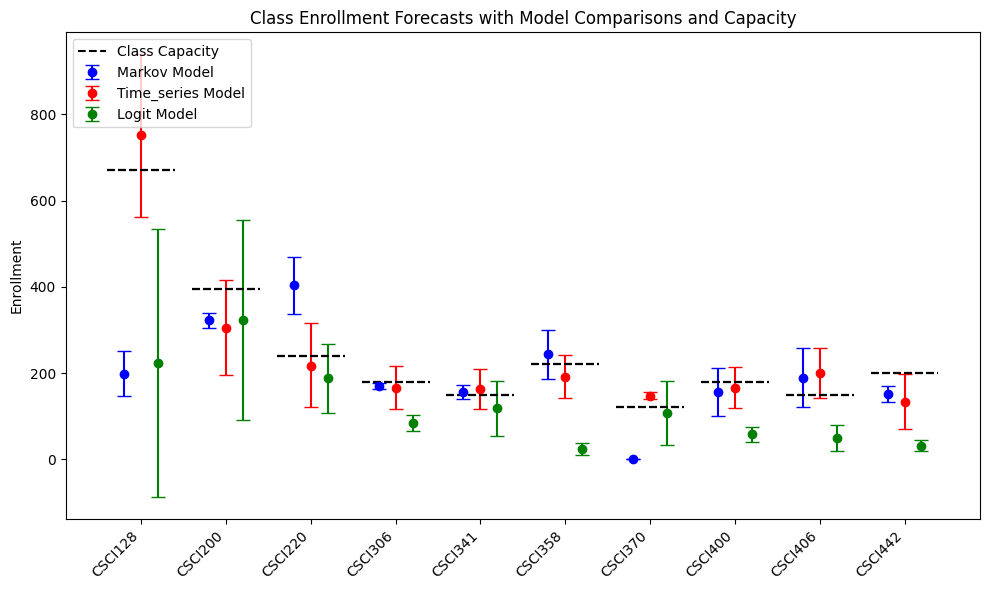

In [61]:
classes = df['class'].unique()
models = df['model'].unique()

# Create figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for models, ensure this matches your model types
colors = ['blue', 'green', 'red']
color_map = {'logit': 'green', 'markov': 'blue', 'time_series': 'red'}

# Complete the plotting with error bars and capacity indication
for i, cl in enumerate(classes):
    class_data = df[df['class'] == cl]

    # Plot for each model type
    for j, model in enumerate(models):
        model_data = class_data[class_data['model'] == model]
        if not model_data.empty:
            y = model_data['point'].values[0]
            yerr = [[y - model_data['lower'].values[0]], [model_data['upper'].values[0] - y]]
            cap = model_data['Cap'].values[0]

            # Adjust the position for each model to avoid overlapping
            position = i + j*0.2 - 0.2  # Adjust the offset for each model

            # Plot point and error bars for each model
            ax.errorbar(position, y, yerr=yerr, fmt='o', color=color_map[model], capsize=5, label=f"{model.capitalize()} Model" if i == 0 else "")
            
            # Plot class capacity
            ax.hlines(cap, i - 0.4, i + 0.4, color='black', linestyle='--', label='Class Capacity' if i == 0 and j == 0 else "")

# Customizing the plot
ax.set_xticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_ylabel('Enrollment')
ax.set_title('Class Enrollment Forecasts with Model Comparisons and Capacity')

# Adding a legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Removing duplicate labels
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.tight_layout()
plt.show()


In [62]:
display(df)

,class,point,upper,lower,model,Cap
0,CSCI128,198,250,146,markov,670
20,CSCI128,751,939,563,time_series,670
10,CSCI128,223,533,-87,logit,670
1,CSCI200,322,339,305,markov,396
21,CSCI200,305,415,195,time_series,396
11,CSCI200,323,556,90,logit,396
2,CSCI220,403,469,336,markov,240
22,CSCI220,217,315,120,time_series,240
12,CSCI220,188,268,108,logit,240
3,CSCI306,170,177,163,markov,180


In [63]:
final_model = pd.read_csv('final_estimates.csv')
final_model['model'] = 'final'
for value in ['upper', 'lower', 'point']: 
    final_model[value] = final_model[value].round(0).astype(int)

# add 15% fudge factor
final_model['upper'] = final_model['upper'] + final_model['Cap'] * 0.15
final_model['lower'] = final_model['lower'] - final_model['Cap'] * 0.15

# concat final model with df
df = pd.concat([df, final_model])
# order by model
df = df.sort_values(by='class')

In [73]:
# rename final to aggregate
df['model'] = df['model'].replace('final', 'aggregate')

In [74]:
display(df)

,class,point,upper,lower,model,Cap
0,CSCI128,198,250.0,146.0,markov,670
20,CSCI128,751,939.0,563.0,time_series,670
10,CSCI128,223,533.0,-87.0,logit,670
11,CSCI200,323,556.0,90.0,logit,396
0,CSCI200,317,495.4,137.6,aggregate,396
1,CSCI200,322,339.0,305.0,markov,396
21,CSCI200,305,415.0,195.0,time_series,396
2,CSCI220,403,469.0,336.0,markov,240
22,CSCI220,217,315.0,120.0,time_series,240
12,CSCI220,188,268.0,108.0,logit,240


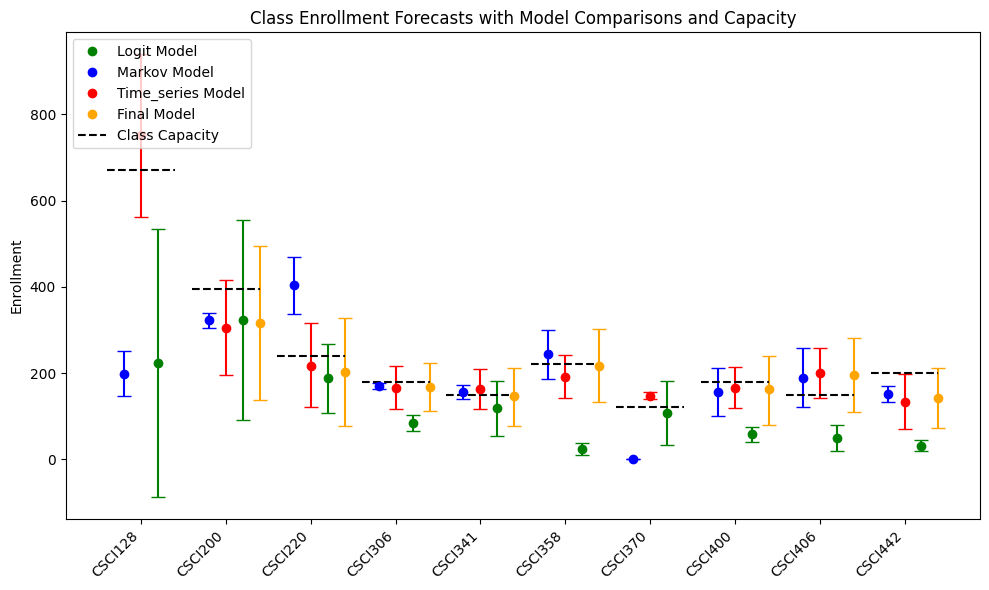

In [72]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Create figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'df' is your DataFrame
classes = df['class'].unique()
models = df['model'].unique()

# Colors for models, ensuring this matches your model types
color_map = {'logit': 'green', 'markov': 'blue', 'time_series': 'red', 'aggregate': 'orange'}

# Plotting
for i, cl in enumerate(classes):
    class_data = df[df['class'] == cl]
    for j, model in enumerate(models):
        model_data = class_data[class_data['model'] == model]
        if not model_data.empty:
            y = model_data['point'].values[0]
            yerr = [[y - model_data['lower'].values[0]], [model_data['upper'].values[0] - y]]
            cap = model_data['Cap'].values[0]

            position = i + j*0.2 - 0.2
            ax.errorbar(position, y, yerr=yerr, fmt='o', color=color_map[model], capsize=5)
    
    ax.hlines(cap, i - 0.4, i + 0.4, color='black', linestyle='--')

# Customizing the plot
ax.set_xticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_ylabel('Enrollment')
ax.set_title('Class Enrollment Forecasts with Model Comparisons and Capacity')

# Manually creating legend handles
legend_handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', label=f"{model.capitalize()} Model") for model, color in color_map.items()]
legend_handles.append(mlines.Line2D([], [], color='black', linestyle='--', label='Class Capacity'))

ax.legend(handles=legend_handles, loc='upper left')

plt.tight_layout()
plt.savefig('../images/final_model_plot.png', dpi=300)

plt.show()

In [69]:
display(df[df['model'] == 'final'][['class', 'point', 'lower', 'upper']])

,class,point,lower,upper
0,CSCI200,317,137.6,495.4
1,CSCI220,203,78.0,328.0
2,CSCI306,168,113.0,224.0
3,CSCI341,146,77.5,210.5
4,CSCI358,217,132.0,303.0
5,CSCI400,163,79.0,240.0
6,CSCI406,195,108.5,280.5
7,CSCI442,141,72.0,211.0
